BE WARNED THIS RUNS SLOW

<h1>Allegheny County Asbestos Permits</h1>
https://data.wprdc.org/dataset/allegheny-county-asbestos-permit
    
This data tracks the current and past permits filed with the City of Pittsburgh to remodel and dispose of asbestos found on a property. The measurements I was interested in were the square footage of reported asbestos as well as the latitude and longitude of these sites. Below I extracted that data, removing the null or 0 data, put it into a dict, then did a plot and a heat map.

In [1]:
#imports
import pandas as pd
import fpsnippets
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

#importing relevant columns
asb = pd.read_csv("asbestos_dataset.csv", usecols = ['city', 'square_feet', 'latitude','longitude'])

#filtering out no given lat and long
asb = asb[~asb.latitude.isnull()]

#filtering out no given square feet
asb = asb[~asb.square_feet.isnull()]

#make a 2D array of neighborhoods and square footage of asbestos?
nghDict = dict()
#filtering out not in a pittsburgh neighborhood

for index, row in asb.iterrows():
    #determine neighborhood of latitude and longitude
    lat = row['latitude']
    long = row['longitude']
    neighborhood = fpsnippets.geo_to_neighborhood(lat,long)

    #parse neighborhoods and associated square footage of asbestos with them
    if neighborhood is not None:
        if neighborhood in nghDict:
            nghDict[neighborhood] += int(row['square_feet'])
        else:
            #add new entry
            nghDict[neighborhood] = int(row['square_feet'])
    
print(nghDict)
sorted_nghDict = dict(sorted(nghDict.items(), key=lambda item: item[1]))
nghDF = pd.Series(sorted_nghDict).to_frame()

print(nghDF)


{'South Shore': 1248746, 'Central Business District': 3897629, 'Shadyside': 263630, 'Squirrel Hill South': 354530, 'Middle Hill': 70502, 'Homewood North': 230041, 'Hazelwood': 191416, 'Perry South': 40046, 'Lower Lawrenceville': 99576, 'Sheraden': 65946, 'Stanton Heights': 6096, 'Allentown': 38782, 'Bluff': 843500, 'Central Oakland': 625401, 'Greenfield': 50811, 'Fineview': 86718, 'North Oakland': 636634, 'Knoxville': 47087, 'Squirrel Hill North': 233275, 'South Oakland': 118225, 'West Oakland': 1647092, 'Bloomfield': 382138, 'Mount Washington': 94535, 'Allegheny Center': 214943, 'East Allegheny': 61515, 'Ridgemont': 235404, 'South Side Flats': 241419, 'Chateau': 58253, 'Overbrook': 78303, 'Strip District': 151405, 'Central Lawrenceville': 126700, 'Brighton Heights': 217614, 'Crafton Heights': 68177, 'Terrace Village': 21792, 'East Liberty': 1880037, 'California-Kirkbride': 58958, 'Point Breeze': 80921, 'Northview Heights': 24952, 'North Shore': 150109, 'Central Northside': 1219061, 'P

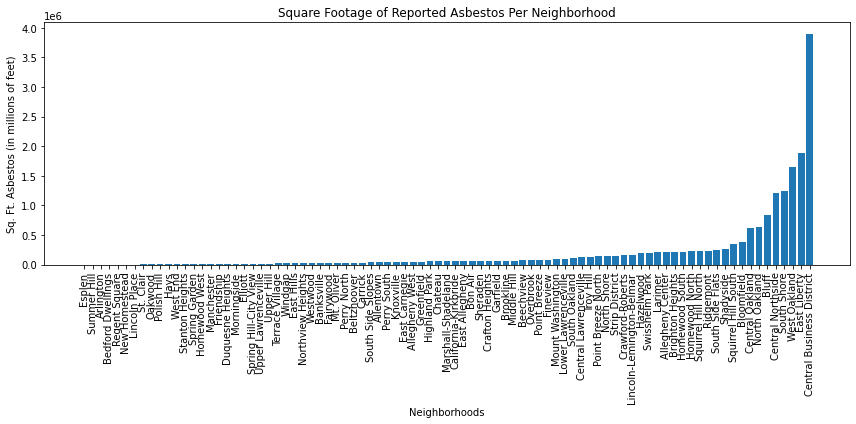

In [2]:
#plot it using matplotlib
plt.figure(figsize=(12, 6)) 
plt.bar(nghDF.index, nghDF[0])  # Assuming the index represents the x-axis values
plt.xlabel('Neighborhoods')  
plt.ylabel('Sq. Ft. Asbestos (in millions of feet)')  
plt.title('Square Footage of Reported Asbestos Per Neighborhood') 
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

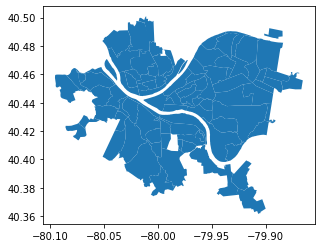

In [3]:
#getting pgh shapefile
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
neighborhoods.plot()

In [17]:
#merging and checking merge
asb_map = neighborhoods.merge(nghDF, how='left', left_on='hood', right_index=True)
asb_map[['hood', 0]].head()

,hood,0
0,Central Oakland,625401.0
1,North Oakland,636634.0
2,West Oakland,1647092.0
3,Crawford-Roberts,157445.0
4,Strip District,151405.0


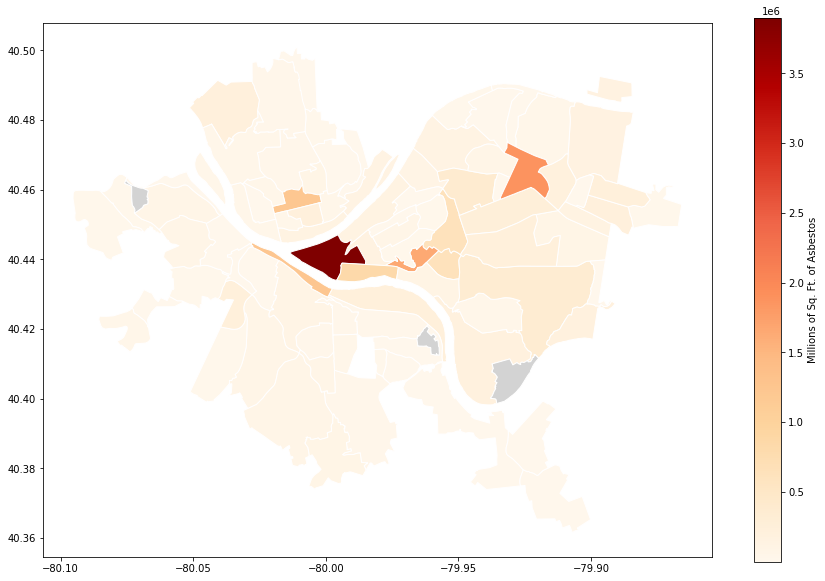

In [18]:
#graphing
asb_map.plot(column= 0, 
               cmap='OrRd',              
               edgecolor="white",       
               legend=True,              
               legend_kwds={'label': "Millions of Sq. Ft. of Asbestos"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"} 
               )

<h1>Conclusion</h1>

Each neighborhood was able to be singled out in the data using the latitude and longitude. As show by the graphs, Esplen had the lowest amount of reported asbestos permits, and was the best in regards to this metric. Esplen is a sparsely populated area, so having less buildings may have skewed this data a bit. The central business district makes a lot of sense for being the worst, given the large amount of old buildings and a high concentration of them.